
# Recommender Systems with Python

In this notebook, we will focus on providing a basic recommendation system by suggesting items that are most similar to a particular item, in this case, movies. Keep in mind, this is not a true robust recommendation system, to describe it more accurately,it just tells you what movies/items are most similar to your movie choice.



An example of recommendation in action is when you visit Amazon and you notice that some items are being recommended to you or when Netflix recommends certain movies to you.

<img src="img.png" height=400 width=600/>

Two users buy the same items A and B from an ecommerce store. When this happens the similarity index of these two users is computed. Depending on the score the system can recommend item C to the other user because it detects that those two users are similar in terms of the items they purchase.

## Import Libraries

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [43]:
pd.DataFrame({
    'User' : np.array(['Titash']),
    'Movie_Name': np.array(['Star Wars']),
    'Number of Ratings the movie recieved' : 750
})

,User,Movie_Name,Number of Ratings the movie recieved
0,Titash,Star Wars,750


#### Suppose a user watched this movie, which is the next movie he should be recommended based on user ratings.

## Get the Data

In [44]:
column_names = ['user_id', 'item_id', 'rating', 'timestamp']
df=pd.read_csv("u.data",sep="\t", names=column_names)

In [45]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [46]:
movie_titles = pd.read_csv("Movie_Id_Titles")

In [47]:
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [48]:
df=pd.merge(df,movie_titles,on='item_id')

In [49]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


##### user_id - the ID of the user who rated the movie.
#####  item_id - the ID of the movie.
#####  rating - The rating the user gave the movie, between 1 and 5.
#####  timestamp - The time the movie was rated.
#####  title - The title of the movie.

In [50]:
df.describe()

,user_id,item_id,rating,timestamp
count,100003.000000,100003.000000,100003.000000,1.000030e+05
mean,462.470876,425.520914,3.529864,8.835288e+08
std,266.622454,330.797791,1.125704,5.343791e+06
min,0.000000,1.000000,1.000000,8.747247e+08
25%,254.000000,175.000000,3.000000,8.794487e+08
50%,447.000000,322.000000,4.000000,8.828269e+08
75%,682.000000,631.000000,4.000000,8.882600e+08
max,943.000000,1682.000000,5.000000,8.932866e+08


We can tell that the average rating is 3.52 and the max is 5. We also see that the dataset has 100003 records.

###### Let’s now create a dataframe with the average rating for each movie and the number of ratings. 

#### We group the dataset by the title column and compute its mean to obtain the average rating for each movie.

In [51]:
df.groupby('title')['rating'].mean().head()

title
'Til There Was You (1997)    2.333333
1-900 (1994)                 2.600000
101 Dalmatians (1996)        2.908257
12 Angry Men (1957)          4.344000
187 (1997)                   3.024390
Name: rating, dtype: float64

#### We group the dataset by the title column and find out the number of ratings given for each movie

In [52]:
df.groupby('title')['rating'].count().head()

title
'Til There Was You (1997)      9
1-900 (1994)                   5
101 Dalmatians (1996)        109
12 Angry Men (1957)          125
187 (1997)                    41
Name: rating, dtype: int64

In [53]:
X=pd.DataFrame(df.groupby('title')['rating'].mean())

In [54]:
X.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [55]:
Y=pd.DataFrame(df.groupby('title')['rating'].count())

In [56]:
Y.head()

,rating
title,
'Til There Was You (1997),9
1-900 (1994),5
101 Dalmatians (1996),109
12 Angry Men (1957),125
187 (1997),41


In [57]:
Y.columns

Index(['rating'], dtype='object')

In [58]:
Y.reset_index(inplace=True)
# using reset_index, title becomes a column and to make it permanent use inplace=True

In [59]:
Y.columns

Index(['title', 'rating'], dtype='object')

In [60]:
Y.columns=['title', 'Number_Of_Ratings']

In [61]:
Y

,title,Number_Of_Ratings
0,'Til There Was You (1997),9
1,1-900 (1994),5
2,101 Dalmatians (1996),109
3,12 Angry Men (1957),125
4,187 (1997),41
5,2 Days in the Valley (1996),93
6,"20,000 Leagues Under the Sea (1954)",72
7,2001: A Space Odyssey (1968),259
8,3 Ninjas: High Noon At Mega Mountain (1998),5
9,"39 Steps, The (1935)",59


In [62]:
X.reset_index(inplace=True)

In [63]:
X.columns

Index(['title', 'rating'], dtype='object')

In [64]:
X.columns=['title', 'AVG_Rating']

In [65]:
X

,title,AVG_Rating
0,'Til There Was You (1997),2.333333
1,1-900 (1994),2.600000
2,101 Dalmatians (1996),2.908257
3,12 Angry Men (1957),4.344000
4,187 (1997),3.024390
5,2 Days in the Valley (1996),3.225806
6,"20,000 Leagues Under the Sea (1954)",3.500000
7,2001: A Space Odyssey (1968),3.969112
8,3 Ninjas: High Noon At Mega Mountain (1998),1.000000
9,"39 Steps, The (1935)",4.050847


## Visualization 

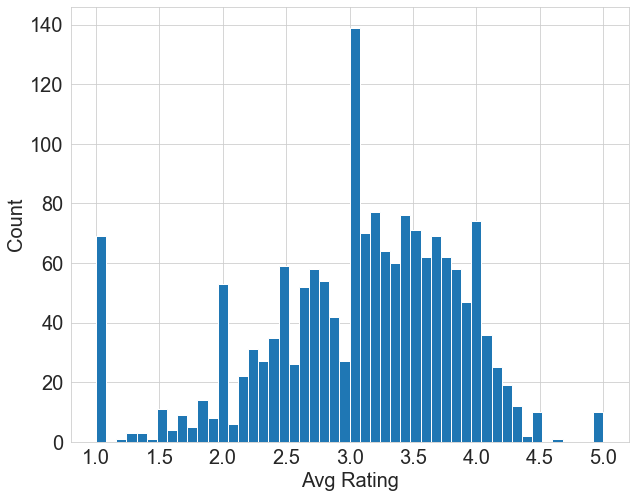

In [140]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.hist(X.AVG_Rating,bins=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Avg Rating",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()

There are some outliers, but it forms a Normal Distribution.

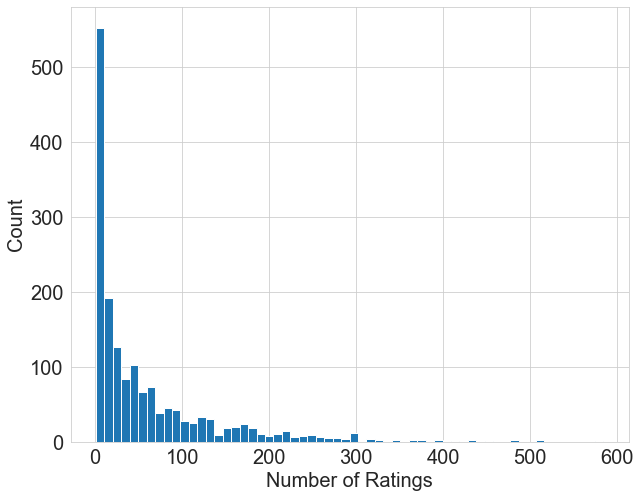

In [141]:
sns.set_style("whitegrid")
plt.figure(figsize=(10,8))
plt.hist(Y.Number_Of_Ratings,bins=60)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel("Number of Ratings",fontsize=20)
plt.ylabel("Count",fontsize=20)
plt.show()
plt.show()

In [68]:
ratings=pd.merge(X,Y,on='title')

In [69]:
ratings.head()

,title,AVG_Rating,Number_Of_Ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


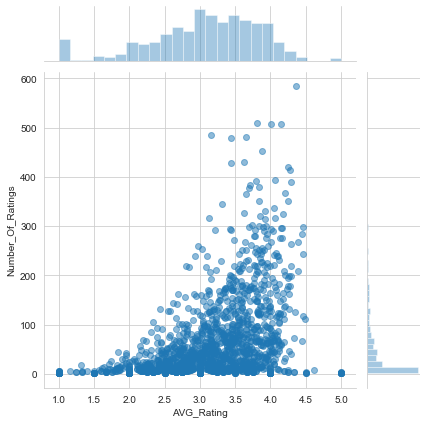

In [70]:
sns.jointplot(data=ratings,x='AVG_Rating',y='Number_Of_Ratings',alpha=0.5)
# alpha is used for transaparency

#### Movies that have a high correlation coefficient are the movies that are most similar to each other. In our case we shall use the Pearson correlation coefficient. This number will lie between -1 and 1. 1 indicates a positive linear correlation while -1 indicates a negative correlation. 0 indicates no linear correlation.

#### "1"   :  If the user has watched movie A, there is a high chance that the user will watch the movie ( Iron Man and Thor)
#### "-1 " :  If the user has watched movie A, there is a high chance that the user will not watch the movie B ( Iron Man and any                                  random flop Hollywood movie)
####  "0"  :  If the user has watched movie A(Iron Man) there is no relation with Iron Man and a Bengali Movie, coz there is no relation                        b/w  Iron Man and a Benagli Movie


## Recommending Similar Movies

We need to convert our dataset into a matrix with the movie titles as the columns, the user_id as the index and the ratings as the values. By doing this we shall get a dataframe with the columns as the movie titles and the rows as the user ids. Each column represents all the ratings of a movie by all users. The rating appear as NAN where a user didn't rate a certain movie. We shall use this matrix to compute the correlation between the ratings of a single movie and the rest of the movies in the matrix. We use pandas pivot_table utility to create the movie matrix.

In [71]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [72]:
movie_matrix = df.pivot_table(index='user_id', columns='title', values='rating')
movie_matrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### Most rated movie:

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

Next let’s look at the most rated movies and choose two of them to work with in this simple recommender system. We use pandas sort_values utility and set ascending to false in order to arrange the movies from the most rated. We then use the head() function to view the top 10.

In [73]:
ratings.head()

,title,AVG_Rating,Number_Of_Ratings
0,'Til There Was You (1997),2.333333,9
1,1-900 (1994),2.600000,5
2,101 Dalmatians (1996),2.908257,109
3,12 Angry Men (1957),4.344000,125
4,187 (1997),3.024390,41


In [74]:
ratings.sort_values('Number_Of_Ratings',ascending=False).head(10)

,title,AVG_Rating,Number_Of_Ratings
1398,Star Wars (1977),4.359589,584
333,Contact (1997),3.803536,509
498,Fargo (1996),4.155512,508
1234,Return of the Jedi (1983),4.007890,507
860,Liar Liar (1997),3.156701,485
460,"English Patient, The (1996)",3.656965,481
1284,Scream (1996),3.441423,478
1523,Toy Story (1995),3.878319,452
32,Air Force One (1997),3.631090,431
744,Independence Day (ID4) (1996),3.438228,429


Let’s assume that a user has watched Star Wars (1997) and Liar Liar (1997). We would like like to recommend movies to this user based on this watching history. The goal is to look for movies that are similar to Star Wars (1997) and Liar Liar (1997) which we shall recommend to this user. We can achieve this by computing the correlation between these two movies’ ratings and the ratings of the rest of the movies in the dataset. The first step is to create a dataframe with the ratings of these movies from our movie_matrix.

In [75]:
starwars_user_ratings = movie_matrix['Star Wars (1977)']
liarliar_user_ratings = movie_matrix['Liar Liar (1997)']
starwars_user_ratings.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In order to compute the correlation between two dataframes we use pandas corwith functionality.
Corrwith computes the pairwise correlation of rows or columns of two dataframe objects.

In [82]:
similar_to_starwars=movie_matrix.corrwith(starwars_user_ratings)
similar_to_liarliar=movie_matrix.corrwith(liarliar_user_ratings)

In [83]:
df1 = pd.DataFrame({"A":[1, 5, 7, 8],  
                    "B":[5, 8, 4, 3], 
                    "C":[10, 4, 9, 3]}) 
  

df2 = pd.DataFrame({"A":[5, 3, 6, 4], 
                    "B":[11, 2, 4, 3], 
                    "C":[4, 3, 8, 5]}) 

In [84]:
df1

,A,B,C
0,1,5,10
1,5,8,4
2,7,4,9
3,8,3,3


In [85]:
df2

,A,B,C
0,5,11,4
1,3,2,3
2,6,4,8
3,4,3,5


In [86]:
df1.corrwith(df2, axis = 0) 

A   -0.041703
B   -0.151186
C    0.395437
dtype: float64

In [88]:
similar_to_starwars

title
'Til There Was You (1997)                                   0.872872
1-900 (1994)                                               -0.645497
101 Dalmatians (1996)                                       0.211132
12 Angry Men (1957)                                         0.184289
187 (1997)                                                  0.027398
2 Days in the Valley (1996)                                 0.066654
20,000 Leagues Under the Sea (1954)                         0.289768
2001: A Space Odyssey (1968)                                0.230884
3 Ninjas: High Noon At Mega Mountain (1998)                      NaN
39 Steps, The (1935)                                        0.106453
8 1/2 (1963)                                               -0.142977
8 Heads in a Duffel Bag (1997)                             -0.577350
8 Seconds (1994)                                           -0.755929
A Chef in Love (1996)                                       0.868599
Above the Rim (1994)        

In [89]:
corr_starwars = pd.DataFrame(similar_to_starwars,columns=['Correlation'])

In [91]:
corr_starwars.reset_index(inplace=True)

In [92]:
corr_starwars.head()

,title,Correlation
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398


In [113]:
corr_starwars.isna().any()

title          False
Correlation     True
dtype: bool

###### dropna: Determine if rows or columns which contain missing values are removed.
###### inplace : bool, default False
###### If True, do operation inplace and return None.

In [118]:
corr_starwars.dropna(inplace=True)

In [119]:
corr_starwars.isna().any()

title          False
Correlation    False
dtype: bool

In [120]:
len(corr_starwars)

1410

In [121]:
corr_starwars.head()

,title,Correlation
0,'Til There Was You (1997),0.872872
1,1-900 (1994),-0.645497
2,101 Dalmatians (1996),0.211132
3,12 Angry Men (1957),0.184289
4,187 (1997),0.027398


So, if I watched Staw Wars Movie, I will be recommended to watch :
    Til There Was You

Now if we sort the dataframe by correlation, we should get the most similar movies, however note that we get some results that don't really make sense. This is because there are a lot of movies only watched once by users who also watched star wars (it was the most popular movie). 

In [122]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)


,title,Correlation
326,Commandments (1997),1.0
343,Cosi (1996),1.0
1072,No Escape (1994),1.0
1418,Stripes (1981),1.0
935,Man of the Year (1995),1.0
688,Hollow Reed (1996),1.0
137,"Beans of Egypt, Maine, The (1994)",1.0
619,"Good Man in Africa, A (1994)",1.0
1091,"Old Lady Who Walked in the Sea, The (Vieille q...",1.0
1114,"Outlaw, The (1943)",1.0


However we have a challenge in that some of the movies have very few ratings and may end up being recommended simply because one or two people gave them a 5 star rating. We can fix this by setting a threshold for the number of ratings. 

In [128]:
new_starwars_corr=pd.merge(corr_starwars,ratings,on='title')

In [129]:
new_starwars_corr.head()

,title,Correlation,AVG_Rating,Number_Of_Ratings
0,'Til There Was You (1997),0.872872,2.333333,9
1,1-900 (1994),-0.645497,2.600000,5
2,101 Dalmatians (1996),0.211132,2.908257,109
3,12 Angry Men (1957),0.184289,4.344000,125
4,187 (1997),0.027398,3.024390,41


In [131]:
new_starwars_corr=new_starwars_corr.drop(columns='AVG_Rating',axis=1)

In [137]:
new_starwars_corr[new_starwars_corr['Number_Of_Ratings']>=100].sort_values('Correlation',ascending=False).head(10)

,title,Correlation,Number_Of_Ratings
1192,Star Wars (1977),1.000000,584
397,"Empire Strikes Back, The (1980)",0.748353,368
1051,Return of the Jedi (1983),0.672556,507
1026,Raiders of the Lost Ark (1981),0.536117,420
91,Austin Powers: International Man of Mystery (1...,0.377433,130
1199,"Sting, The (1973)",0.367538,241
647,Indiana Jones and the Last Crusade (1989),0.350107,331
983,Pinocchio (1940),0.347868,101
492,"Frighteners, The (1996)",0.332729,115
715,L.A. Confidential (1997),0.319065,297


So, **Empire Strikes Back, The (1980)** is the most recommended movie for a  person who watched **Star Wars(1977)**

----------------------------------------------------




In [148]:
lie=pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [149]:
lie.reset_index(inplace=True)

In [152]:
lie.sort_values('Correlation',ascending=False).head()

,title,Correlation
205,"Bonheur, Le (1965)",1.0
541,For Ever Mozart (1996),1.0
353,Crossfire (1947),1.0
784,Johnny 100 Pesos (1993),1.0
998,Moonlight and Valentino (1995),1.0


In [154]:
lielie=pd.merge(lie,ratings,on='title')

In [155]:
lielie.head()

,title,Correlation,AVG_Rating,Number_Of_Ratings
0,'Til There Was You (1997),0.118913,2.333333,9
1,1-900 (1994),NaN,2.600000,5
2,101 Dalmatians (1996),0.469765,2.908257,109
3,12 Angry Men (1957),0.066272,4.344000,125
4,187 (1997),0.175145,3.024390,41


Filtering out movies that have less than 100 reviews

In [156]:
lays=lielie[lielie['Number_Of_Ratings']>=100]

In [157]:
lays.head()

,title,Correlation,AVG_Rating,Number_Of_Ratings
2,101 Dalmatians (1996),0.469765,2.908257,109
3,12 Angry Men (1957),0.066272,4.344000,125
7,2001: A Space Odyssey (1968),-0.057864,3.969112,259
15,Absolute Power (1997),0.240303,3.370079,127
16,"Abyss, The (1989)",0.245412,3.589404,151


In [158]:
lays.sort_values('Correlation',ascending=False).head(10)

,title,Correlation,AVG_Rating,Number_Of_Ratings
860,Liar Liar (1997),1.000000,3.156701,485
133,Batman Forever (1995),0.516968,2.666667,114
950,"Mask, The (1994)",0.484650,3.193798,129
431,Down Periscope (1996),0.472681,2.702970,101
327,Con Air (1997),0.469828,3.459854,137
1173,Pretty Woman (1990),0.469790,3.323171,164
2,101 Dalmatians (1996),0.469765,2.908257,109
971,Michael (1996),0.442022,3.319328,119
1603,Waterworld (1995),0.438405,2.803922,102
747,Indiana Jones and the Last Crusade (1989),0.414427,3.930514,331


**So, Batman Forever(1995) is the most recommended movie for a person who watched Liar Liar.**